In [1]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [2]:
import numpy as np
import pandas as pd
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [3]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.ext.declarative import declarative_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func
Base = automap_base()

In [4]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:///Resources/hawaii.sqlite")
Base.metadata.create_all(engine)

In [5]:
# reflect an existing database into a new model
Base.prepare(autoload_with=engine)
# reflect the tables


In [6]:
# View all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [7]:
# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

In [8]:
# Create our session (link) from Python to the DB
session = Session(engine)

# Exploratory Precipitation Analysis

In [9]:
# Find the most recent date in the data set.
for row in session.query(Measurement, Measurement.date).limit(5).all():
    print(row)

(<sqlalchemy.ext.automap.measurement object at 0x000001D94BE8A930>, '2010-01-01')
(<sqlalchemy.ext.automap.measurement object at 0x000001D94BE8A780>, '2010-01-02')
(<sqlalchemy.ext.automap.measurement object at 0x000001D94BE8AAE0>, '2010-01-03')
(<sqlalchemy.ext.automap.measurement object at 0x000001D94BE88800>, '2010-01-04')
(<sqlalchemy.ext.automap.measurement object at 0x000001D94BE8A3F0>, '2010-01-06')


In [30]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 
# Starting from the most recent data point in the database. 
cutoff_date = '2016-08-23'
# Calculate the date one year from the last date in data set.
prcp = session.query(Measurement.date, Measurement.prcp).filter(Measurement.date > cutoff_date).all()

print(prcp)

# Perform a query to retrieve the data and precipitation scores
prcp_df = pd.DataFrame(prcp)



prcp_sort = prcp_df.sort_values(by = 'date', ascending=True)

prcp_sort



[('2016-08-24', 0.08), ('2016-08-25', 0.08), ('2016-08-26', 0.0), ('2016-08-27', 0.0), ('2016-08-28', 0.01), ('2016-08-29', 0.0), ('2016-08-30', 0.0), ('2016-08-31', 0.13), ('2016-09-01', 0.0), ('2016-09-02', 0.0), ('2016-09-03', 0.0), ('2016-09-04', 0.03), ('2016-09-05', None), ('2016-09-06', None), ('2016-09-07', 0.05), ('2016-09-08', 0.0), ('2016-09-09', 0.03), ('2016-09-10', 0.0), ('2016-09-11', 0.05), ('2016-09-12', 0.0), ('2016-09-13', 0.02), ('2016-09-14', 1.32), ('2016-09-15', 0.42), ('2016-09-16', 0.06), ('2016-09-17', 0.05), ('2016-09-18', 0.0), ('2016-09-19', 0.0), ('2016-09-20', 0.0), ('2016-09-21', 0.0), ('2016-09-22', 0.02), ('2016-09-23', 0.0), ('2016-09-24', 0.0), ('2016-09-25', 0.0), ('2016-09-26', 0.06), ('2016-09-27', 0.02), ('2016-09-28', 0.0), ('2016-09-29', 0.0), ('2016-09-30', 0.0), ('2016-10-01', 0.0), ('2016-10-02', 0.0), ('2016-10-03', 0.0), ('2016-10-04', 0.0), ('2016-10-05', 0.0), ('2016-10-06', 0.0), ('2016-10-07', 0.0), ('2016-10-08', 0.0), ('2016-10-09', 

,date,prcp
0,2016-08-24,0.08
1006,2016-08-24,NaN
1524,2016-08-24,2.15
702,2016-08-24,2.28
360,2016-08-24,2.15
...,...,...
1522,2017-08-22,0.00
1523,2017-08-23,0.08
359,2017-08-23,0.00
1005,2017-08-23,0.00


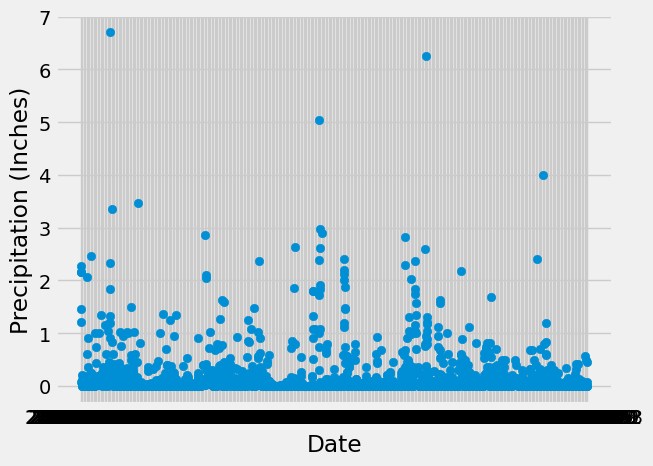

In [35]:


# Use Pandas Plotting with Matplotlib to plot the data
x_values = prcp_sort['date']
y_values = prcp_sort['prcp']
plt.scatter(x_values, y_values)
plt.xlabel('Date')
plt.ylabel('Precipitation (Inches)')
plt.show()

In [36]:
# Use Pandas to calculate the summary statistics for the precipitation data
prcp_mean = prcp_df['prcp'].mean()
prcp_std_dev = prcp_df['prcp'].std()
prcp_min = prcp_df['prcp'].min()
prcp_max = prcp_df['prcp'].max()
prcp_median = prcp_df['prcp'].median()


quartiles = prcp_df['prcp'].quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq

print(f"Mean: {prcp_mean}")
print(f"Std.: {prcp_std_dev}")
print(f"Min: {prcp_min}")
print(f"25%: {lowerq}")
print(f"50%: {prcp_median}")
print(f"50%: {quartiles[0.5]} (calculated a 2nd way)")
print(f"75%: {upperq}")
print(f"Max: {prcp_max}")
print(f"IQR: {iqr}")

prcp_df['prcp'].describe()

Mean: 0.17646153846153848
Std.: 0.46028836368132586
Min: 0.0
25%: 0.0
50%: 0.02
50%: 0.02 (calculated a 2nd way)
75%: 0.13
Max: 6.7
IQR: 0.13


count    2015.000000
mean        0.176462
std         0.460288
min         0.000000
25%         0.000000
50%         0.020000
75%         0.130000
max         6.700000
Name: prcp, dtype: float64

# Exploratory Station Analysis

In [37]:
# Design a query to calculate the total number of stations in the dataset
num_stations = session.query(Measurement.station).count()
num_stations

19550

In [ ]:
# Design a query to find the most active stations (i.e. which stations have the most rows?)
# List the stations and their counts in descending order.

active_stations = session.query(Measurement.station, func.count(Measurement.station)).group_by(Measurement.station).order_by(func.count(Measurement.station).desc()).all()
active_stations



[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [39]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.
most_active_station_temps = session.query(Measurement.tobs).filter(Measurement.station == 'USC00519281').all()
temps_df = pd.DataFrame(most_active_station_temps)
min_temp = temps_df.min()
max_temp = temps_df.max()
avg_temp = temps_df.mean()
print(f"Station USC00519281 min temp: {min_temp}")
print(f"Station USC00519281 max temp: {max_temp}")
print(f"Station USC00519281 avg temp: {avg_temp}")
      

Station USC00519281 min temp: tobs    54.0
dtype: float64
Station USC00519281 max temp: tobs    85.0
dtype: float64
Station USC00519281 avg temp: tobs    71.663781
dtype: float64


<Axes: ylabel='Frequency'>

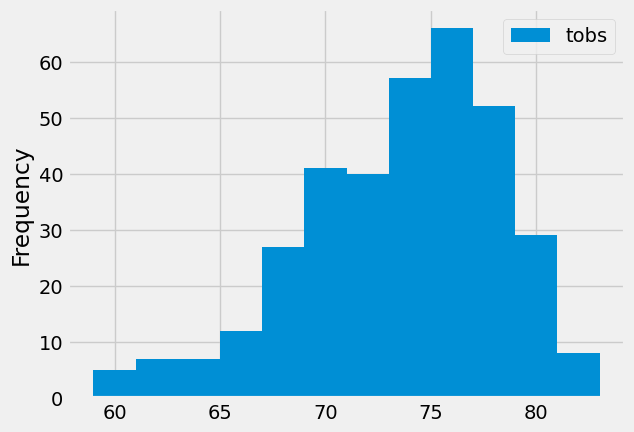

In [40]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
cutoff_date_12month = '2016-08-23'
last_12_months_temps = session.query(Measurement.tobs).filter((Measurement.station == 'USC00519281') & (Measurement.date > cutoff_date_12month)).all()
last_12_months_temps_df = pd.DataFrame(last_12_months_temps)
last_12_months_temps_df
last_12_months_temps_df.plot.hist(bins=12)

# Close Session

In [41]:
# Close Session
session.close()